In [3]:
!pip install plotly
# Required Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import plotly.plotly as py
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#For LR
import statsmodels.api as sm

In [4]:
#For LR That looks like R
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
print("Packages LOADED")

Packages LOADED


In [5]:
import os
print(os.getcwd())

C:\Users\HP


In [6]:
os.chdir('E:\data science\AI\Datasets')
print(os.getcwd())

E:\data science\AI\Datasets


In [7]:
data= pd.read_csv('diabetes2.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


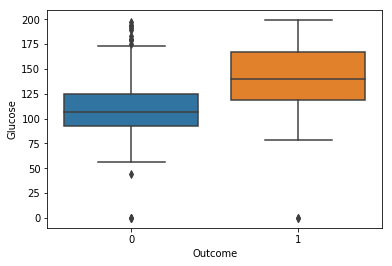

In [9]:
get_ipython().magic('matplotlib inline')                   #    ?
sns.boxplot(data.Outcome,data.Glucose)
plt.show()                                                   # important

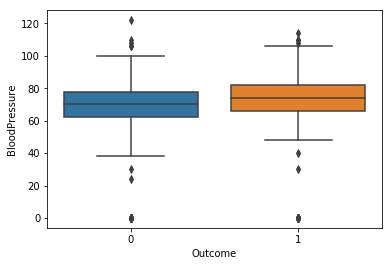

In [10]:
sns.boxplot(data.Outcome,data.BloodPressure)           # not imp

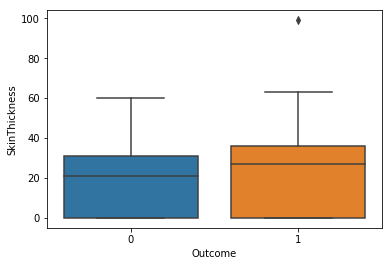

In [11]:
sns.boxplot(data.Outcome,data.SkinThickness)               # not imp

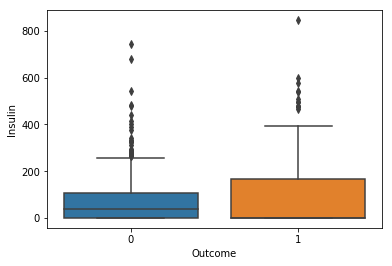

In [12]:
sns.boxplot(data.Outcome,data.Insulin)               #  imp

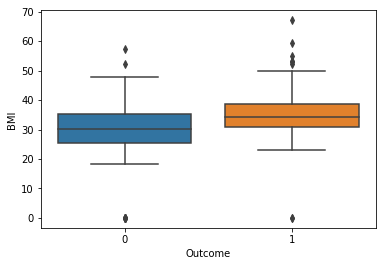

In [13]:
sns.boxplot(data.Outcome,data.BMI)                  # not imp

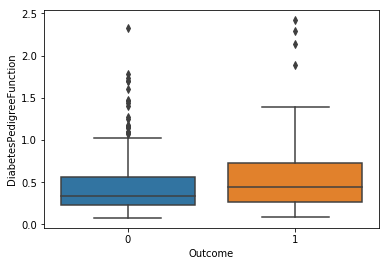

In [14]:
sns.boxplot(data.Outcome,data.DiabetesPedigreeFunction)           # not imp

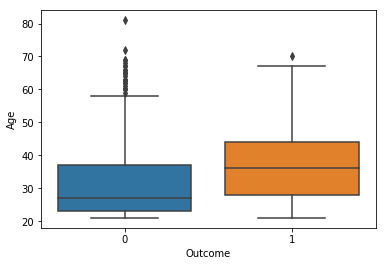

In [15]:
sns.boxplot(data.Outcome,data.Age)                  #  imp

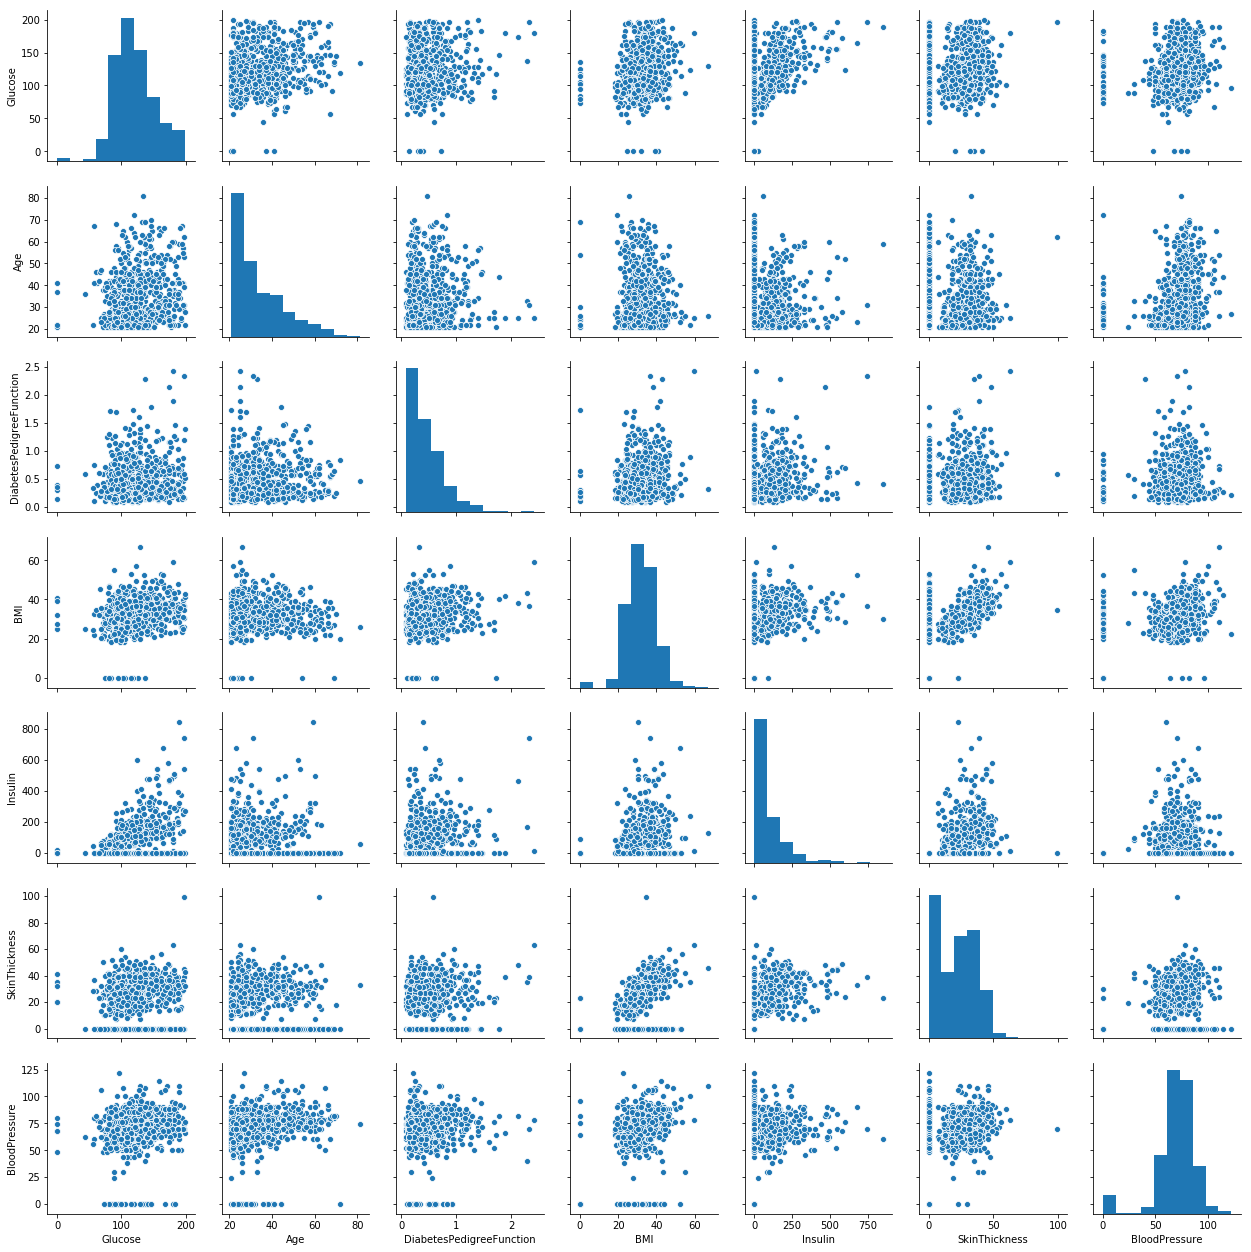

In [16]:
data_n=data[['Glucose','Age','DiabetesPedigreeFunction','BMI',
             'Insulin','SkinThickness','BloodPressure']]
sns.pairplot(data_n)
plt.show()

In [17]:
corr = data.corr()                         # converted to binary values
print(corr)
print('-'*30)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [18]:
mask = np.zeros_like(corr, dtype=np.bool)          #       all values by false
print(mask)
print('-'*30)

[[False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]]
------------------------------


In [19]:
mask[np.triu_indices_from(mask)] = True  #Return the indices for the upper-triangle of arr by (true)
print(mask)

[[ True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True]
 [False False False False False  True  True  True  True]
 [False False False False False False  True  True  True]
 [False False False False False False False  True  True]
 [False False False False False False False False  True]]


'palette or cmap : seaborn color palette or matplotlib colormap\n    List-like object of colors as RGB tuples, or colormap object that\n    can map continuous values to colors, depending on the value of the\n    ``as_cmap`` parameter.\n    \ncenter : {"light", "dark"}, optional\n    Whether the center of the palette is light or dark\n\n\nas_cmap : bool, optional\n    If true, return a matplotlib colormap object rather than a\n    list of colors.\n    \nmask : boolean array or DataFrame, optional\n    If passed, data will not be shown in cells where ``mask`` is True.\n    Cells with missing values are automatically masked.\n    \ncmap : matplotlib colormap name or object, or list of colors, optional\n    The mapping from data values to color space. If not provided, the\n    default will depend on whether ``center`` is set.'

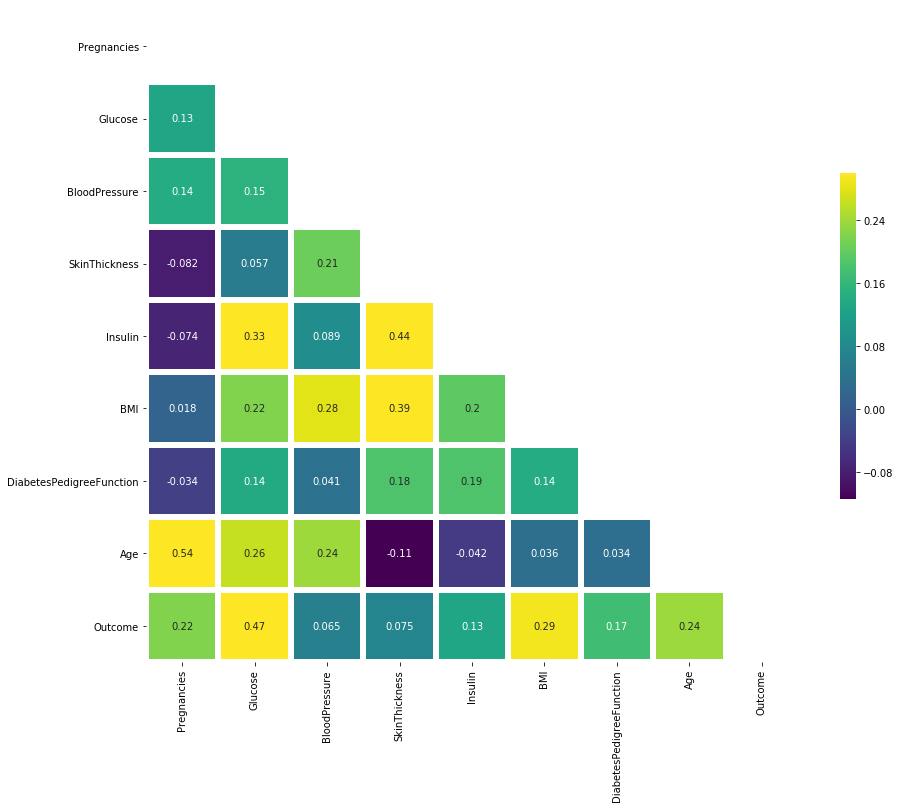

In [20]:
colormap = plt.cm.viridis
f,ax = plt.subplots(figsize=(15, 12))        # x axis = 11, y =9
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)    # Make a diverging palette between two HUSL colors.
                                                        #110 and 10 are  to change color
sns.heatmap(corr, mask=mask, cmap=colormap, vmax=.3,         
                square=True,
        linewidths=5, cbar_kws={"shrink":.5},ax=ax,annot=True)   # vmax is changing the scale 
# linewidths is width between boxes
# shrink is to reduce or increase the size of scale
# ax=ax  no use , square = true or false or none used also no change
'''palette or cmap : seaborn color palette or matplotlib colormap
    List-like object of colors as RGB tuples, or colormap object that
    can map continuous values to colors, depending on the value of the
    ``as_cmap`` parameter.
    
center : {"light", "dark"}, optional
    Whether the center of the palette is light or dark


as_cmap : bool, optional
    If true, return a matplotlib colormap object rather than a
    list of colors.
    
mask : boolean array or DataFrame, optional
    If passed, data will not be shown in cells where ``mask`` is True.
    Cells with missing values are automatically masked.
    
cmap : matplotlib colormap name or object, or list of colors, optional
    The mapping from data values to color space. If not provided, the
    default will depend on whether ``center`` is set.'''


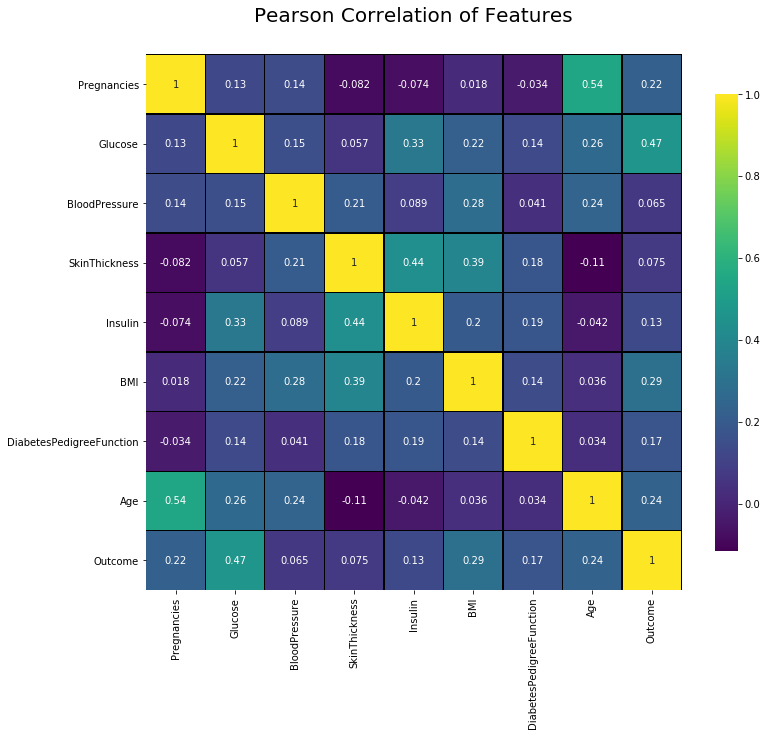

In [21]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))          # size of figure
plt.title('Pearson Correlation of Features', y=1.05, size=20)  # adjusting title  y value is distAnce 
# between title to heat map     size of title
sns.heatmap(data.corr(),linewidths=0.2,vmax=1.0, square=True, cmap=colormap, 
            linecolor='black', annot=True,cbar_kws={"shrink": .7})

# vmax is range of scale
# shrink is to adjust size of scale
#cmap=cmap and cmap=colormap is for giving different colors
#annot : if it is true gives values in box , false= no values in box
    

In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
truediabetes= data.loc[data['Outcome']==1]

In [24]:
truediabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [25]:
len(truediabetes)

268

In [26]:
truediabetes.mean()

Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [27]:
falsediabetes= data.loc[data['Outcome']==0]

In [28]:
len(falsediabetes)

500

In [29]:
falsediabetes.mean()

Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

'hue : string (variable name), optional\n    Variable in ``data`` to map plot aspects to different colors.\nhue_order : list of strings\n    Order for the levels of the hue variable in the palette\npalette : dict or seaborn color palette\n    Set of colors for mapping the ``hue`` variable. If a dict, keys\n    should be values  in the ``hue`` variable.'

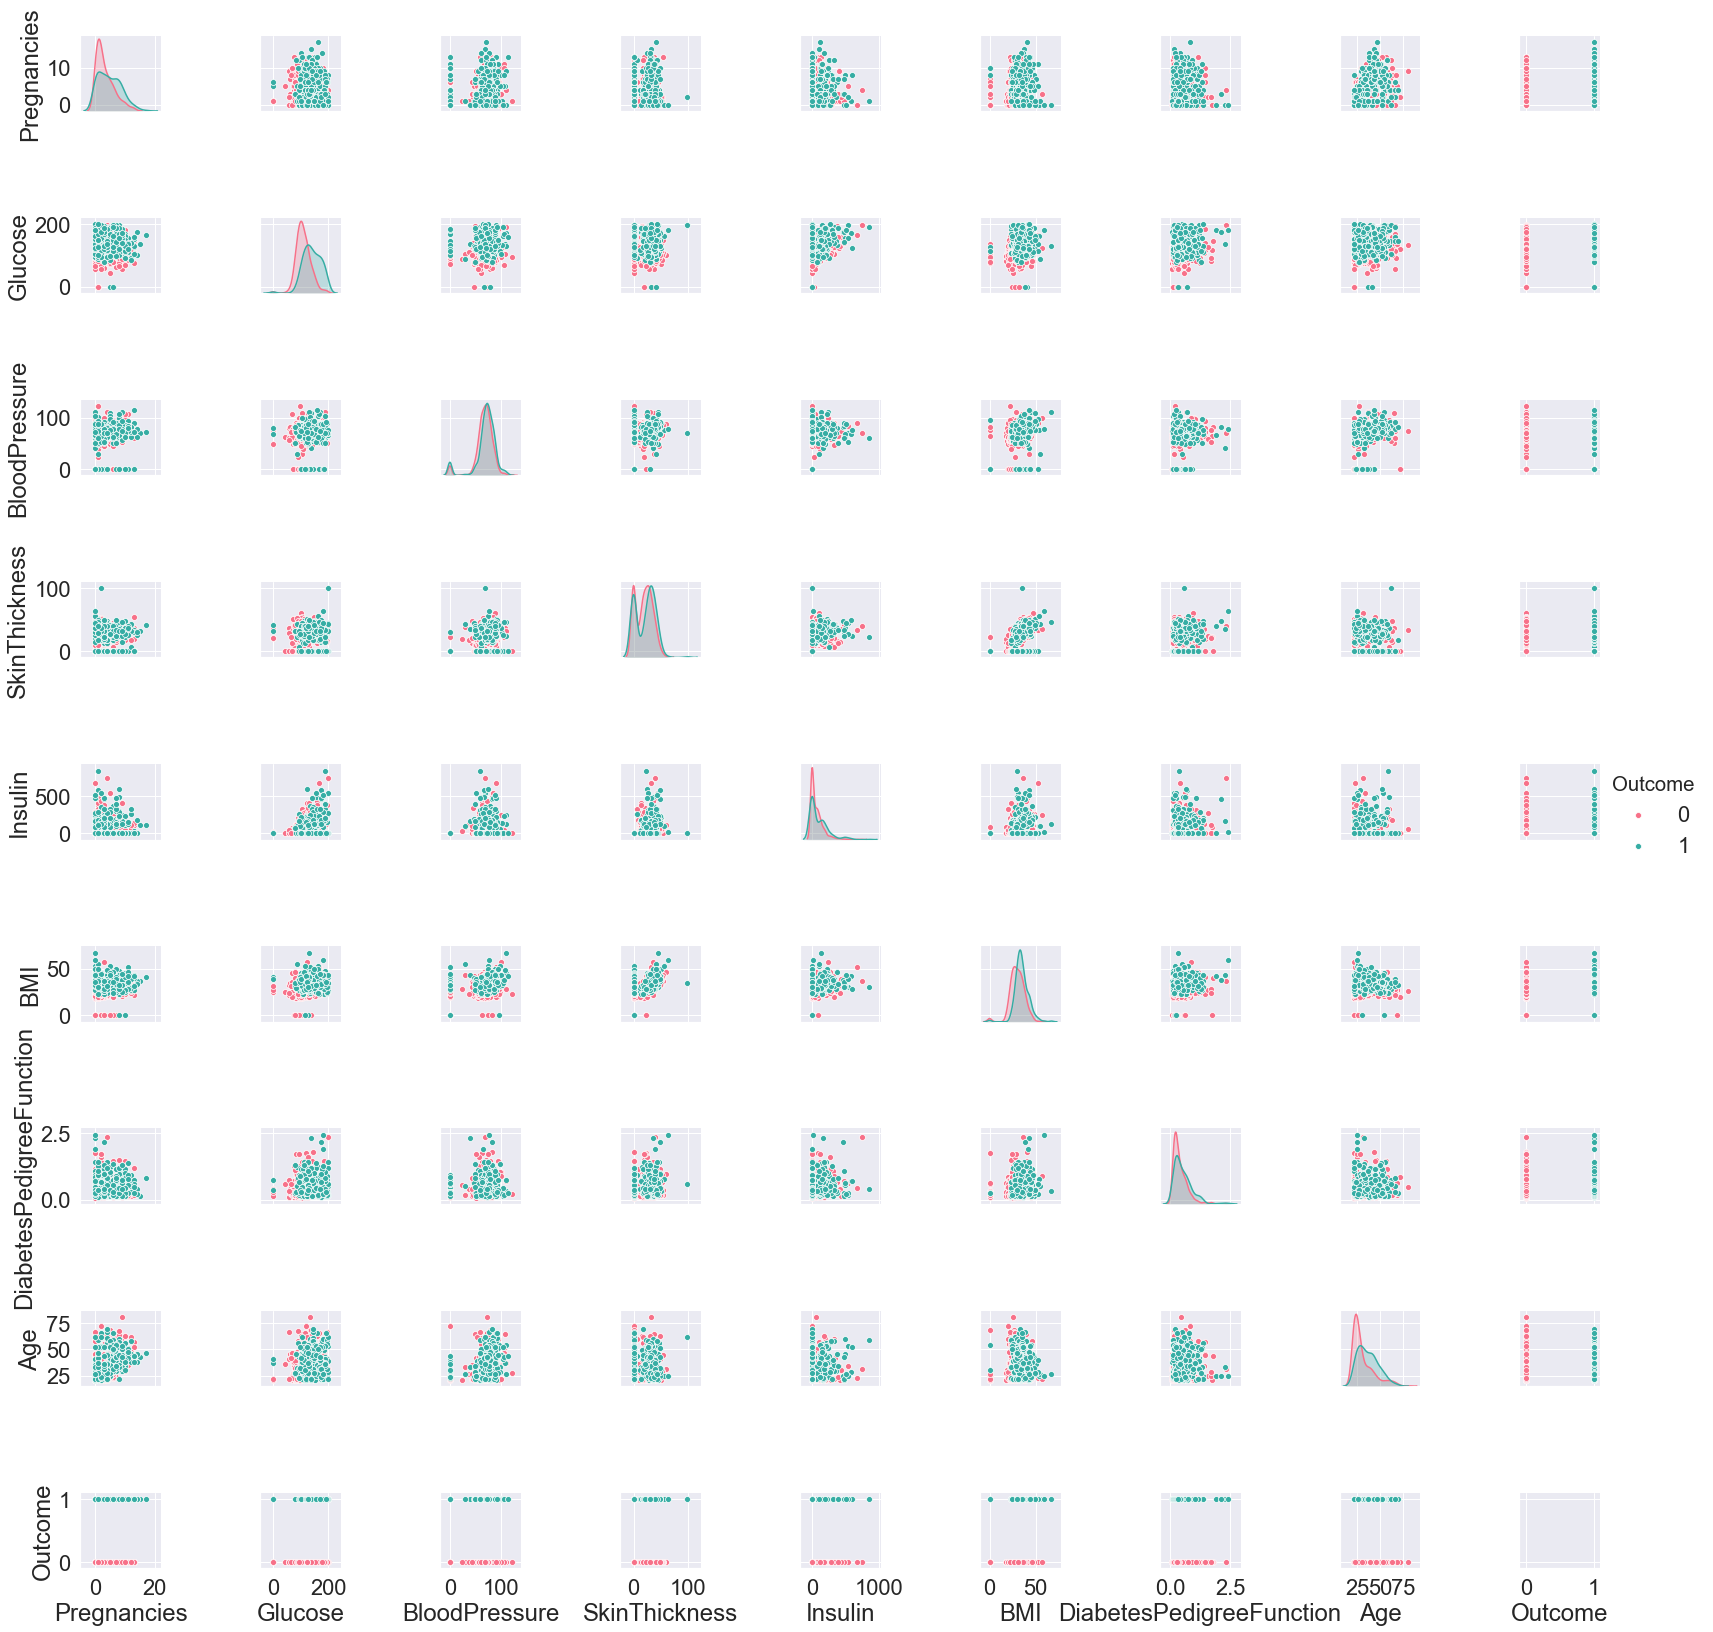

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(data.dropna(), hue='Outcome', palette="husl")

'''hue : string (variable name), optional
    Variable in ``data`` to map plot aspects to different colors.
hue_order : list of strings
    Order for the levels of the hue variable in the palette
palette : dict or seaborn color palette
    Set of colors for mapping the ``hue`` variable. If a dict, keys
    should be values  in the ``hue`` variable.'''
#Draw scatterplots for joint relationships and histograms for univariate  distributions:


In [31]:
import numpy as np
import seaborn as sns
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
        'BMI','DiabetesPedigreeFunction','Age', 'Outcome']

In [32]:
cm = np.corrcoef(data[cols].values.T)
cm

array([[ 1.        ,  0.12945867,  0.14128198, -0.08167177, -0.07353461,
         0.01768309, -0.03352267,  0.54434123,  0.22189815],
       [ 0.12945867,  1.        ,  0.15258959,  0.05732789,  0.33135711,
         0.22107107,  0.1373373 ,  0.26351432,  0.4665814 ],
       [ 0.14128198,  0.15258959,  1.        ,  0.20737054,  0.08893338,
         0.28180529,  0.04126495,  0.23952795,  0.06506836],
       [-0.08167177,  0.05732789,  0.20737054,  1.        ,  0.43678257,
         0.3925732 ,  0.18392757, -0.11397026,  0.07475223],
       [-0.07353461,  0.33135711,  0.08893338,  0.43678257,  1.        ,
         0.19785906,  0.18507093, -0.04216295,  0.13054795],
       [ 0.01768309,  0.22107107,  0.28180529,  0.3925732 ,  0.19785906,
         1.        ,  0.14064695,  0.03624187,  0.29269466],
       [-0.03352267,  0.1373373 ,  0.04126495,  0.18392757,  0.18507093,
         0.14064695,  1.        ,  0.03356131,  0.17384407],
       [ 0.54434123,  0.26351432,  0.23952795, -0.11397026, -0

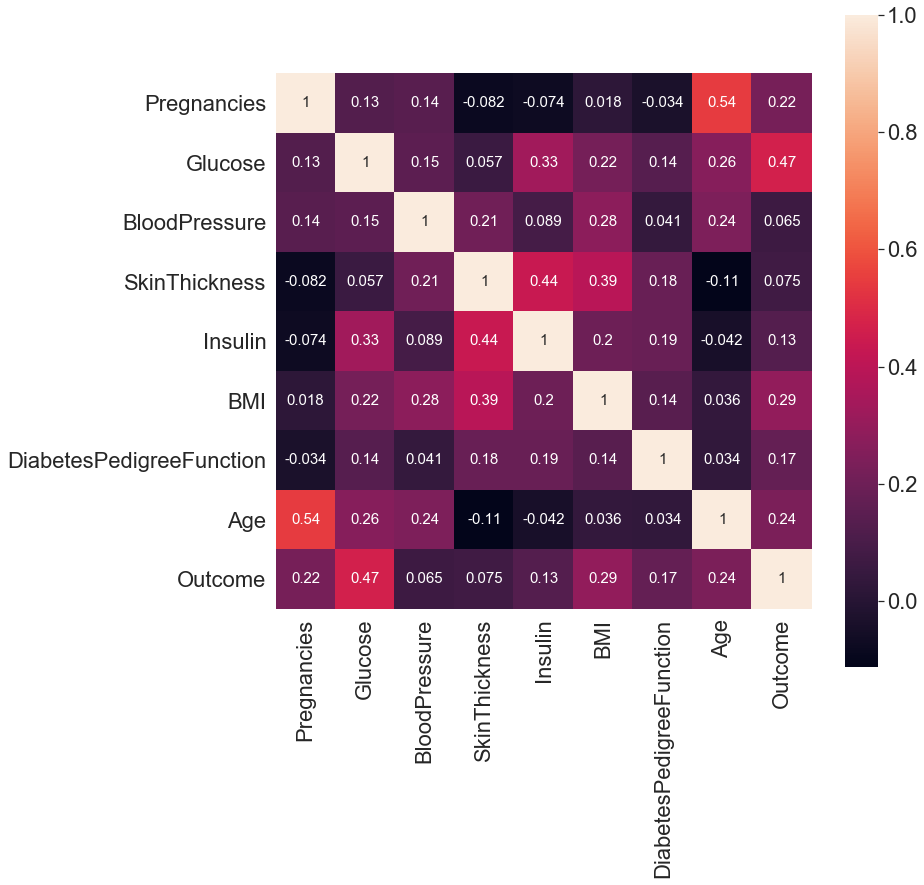

In [33]:
sns.set(font_scale=2)    # changing the size of headings bp,st,.....dpf
plt.figure(figsize=(12,12))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2g',
                 annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

# annot_kws is for changing the size of values in box
# yticklabels=cols,xticklabels=cols     labels
#  cbar=False or none  is to remove scale   if cbar= true gives scale 
#   annot=True  for to give values in box 
#   

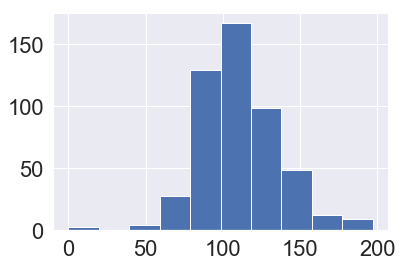

In [34]:
data.loc[data['Outcome'] == 0, 'Glucose'].hist()

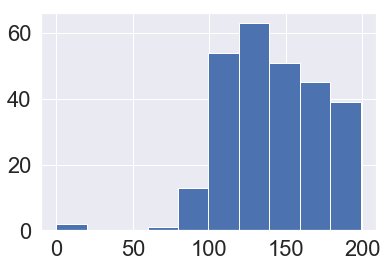

In [35]:
data.loc[data['Outcome']==1, 'Glucose'].hist()

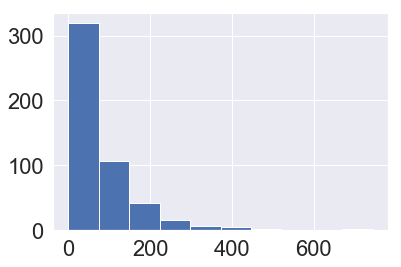

In [36]:
data.loc[data['Outcome']==0, 'Insulin'].hist()

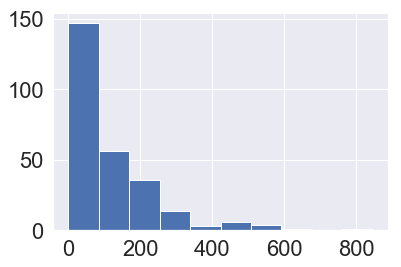

In [37]:
data.loc[data['Outcome']==1, 'Insulin'].hist()

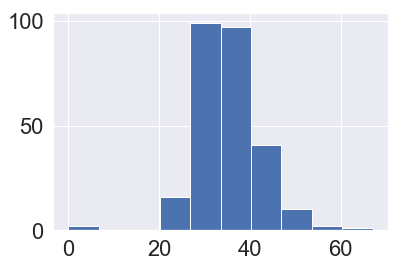

In [38]:
data.loc[data['Outcome']==1, 'BMI'].hist()

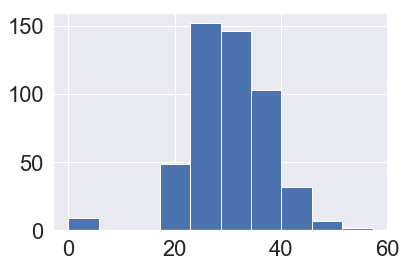

In [39]:
data.loc[data['Outcome']==0, 'BMI'].hist()

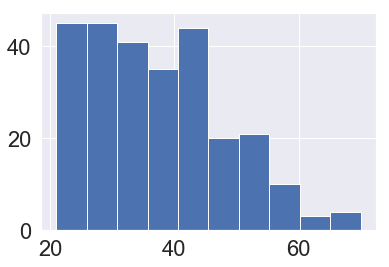

In [40]:
data.loc[data['Outcome']==1, 'Age'].hist()

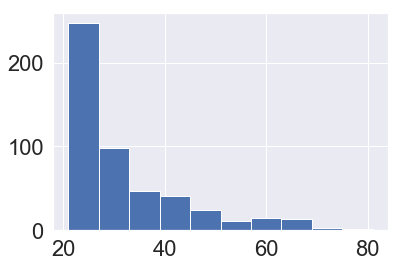

In [41]:
data.loc[data['Outcome']==0, 'Age'].hist()

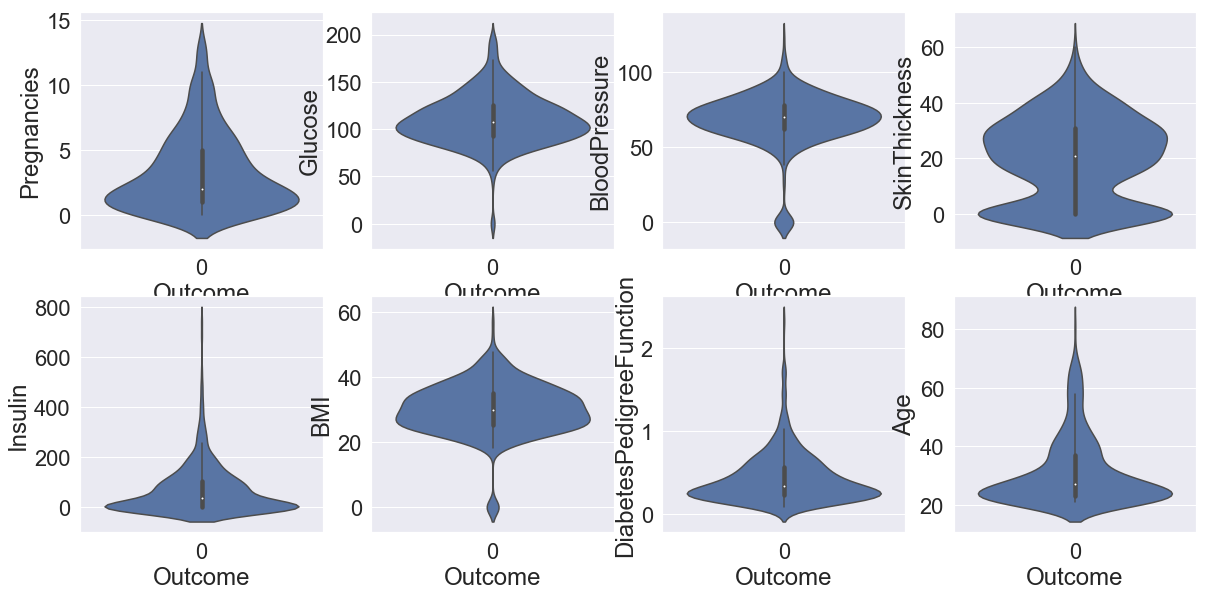

In [42]:
plt.figure(figsize=(20, 20))
for column_index, column in enumerate(falsediabetes.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.violinplot(x='Outcome', y=column, data=falsediabetes)

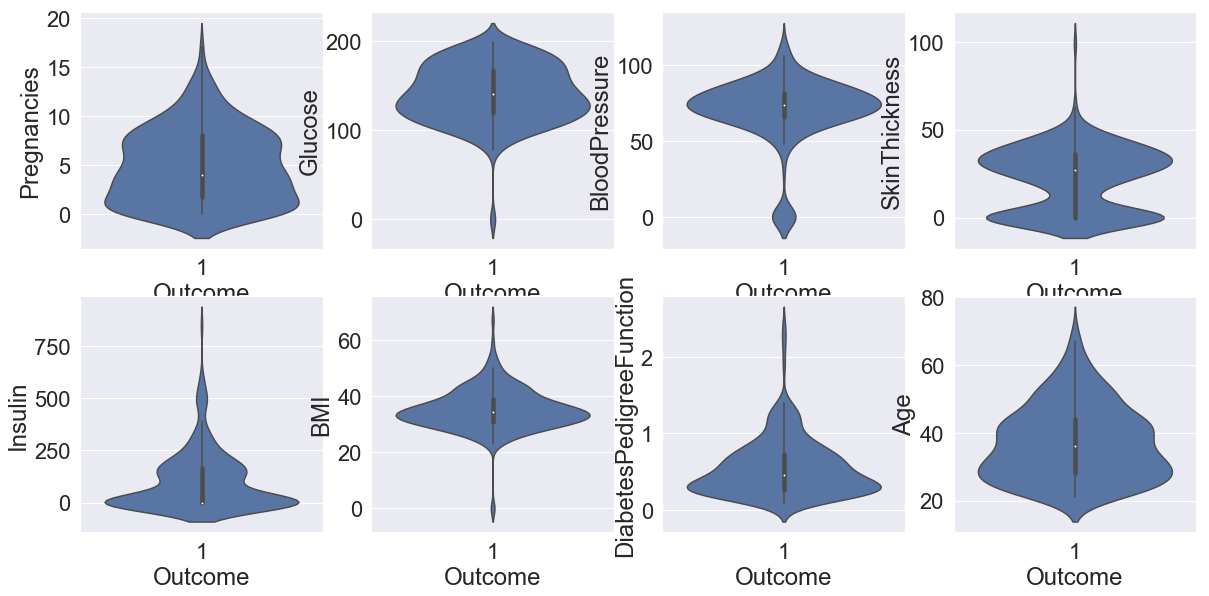

In [43]:
plt.figure(figsize=(20, 20))
for column_index, column in enumerate(truediabetes.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.violinplot(x='Outcome', y=column, data=truediabetes)

In [ ]:
plt.figure(figsize=(10, 10))
# class distribution
print(" == class distribution ==")
print(data.groupby('Outcome').size())
print(" == Univariate Plots: box and whisker plots. determine outliers = ")
data.plot(kind='pie', subplots=True, layout=(3,3), sharex=True, sharey=False)
plt.show()

'''sharex : boolean, default True if ax is None else False
    In case subplots=True, share x axis and set some x axis labels to
    invisible; defaults to True if ax is None otherwise False if an ax
    is passed in; Be aware, that passing in both an ax and sharex=True
    will alter all x axis labels for all axis in a figure!


sharey : boolean, default False
    In case subplots=True, share y axis and set some y axis labels to
    invisible'''

 == class distribution ==
Outcome
0    500
1    268
dtype: int64
 == Univariate Plots: box and whisker plots. determine outliers = 


<Figure size 720x720 with 0 Axes>

 == Univariate Plots: histograms. determine if the distribution is normal-like == 


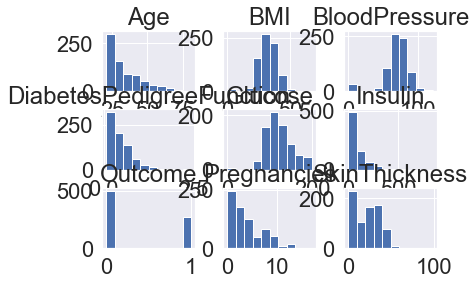

In [45]:

print(" == Univariate Plots: histograms. determine if the distribution is normal-like == ")
data.hist()
plt.show()

== Multivariate Plots: scatter plot matrix. spot structured relationships between input variables ==


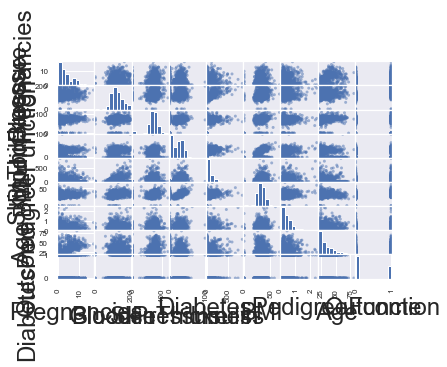

In [46]:

import pandas
from pandas.plotting import scatter_matrix
print("== Multivariate Plots: scatter plot matrix. spot structured relationships between input variables ==")
scatter_matrix(data)
plt.show()

In [49]:
#!pip install pydot
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import xgboost as xgb
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
pd.set_option('display.notebook_repr_html', False)
get_ipython().magic('matplotlib inline')
plt.style.use('seaborn-white')
print("Package Loaded")

Package Loaded


In [50]:
import sklearn
array = data.values
array
type(array)
X = array[:,0:8] # ivs for train
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [51]:
y = array[:,8] # dv
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [52]:
test_size = 0.33
from sklearn.model_selection import train_test_split
#pip install -U scikit-learn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
print('Partitioning Done!')


Partitioning Done!


In [53]:
regr = skl_lm.LogisticRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
regr.score(X_test,y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.7992125984251969

In [54]:
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True       0.0  1.0
Predicted          
0.0        158   35
1.0         16   45
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       174
         1.0       0.74      0.56      0.64        80

   micro avg       0.80      0.80      0.80       254
   macro avg       0.78      0.74      0.75       254
weighted avg       0.79      0.80      0.79       254



In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
fpr, tpr, _ = roc_curve(y_test, pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.74


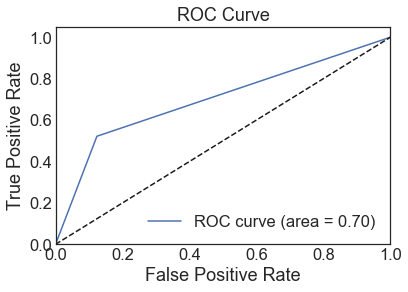

In [91]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [92]:
regr.score(X_test,y_test)

0.7480314960629921

In [94]:
train, test = sklearn.model_selection.train_test_split(data, train_size = 0.7)
print("For Main Data Set :",data["Outcome"].count())
print("For Train Set :",train["Outcome"].count())
print("For Test Set :",test["Outcome"].count())
x_train=train[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
x_test=test[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
y_train=train["Outcome"]
y_test=test["Outcome"]

For Main Data Set : 768
For Train Set : 537
For Test Set : 231


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [95]:
est = smf.Logit(y_train,x_train).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.591188
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 Apr 2019   Pseudo R-squ.:                 0.08367
Time:                        18:06:43   Log-Likelihood:                -317.47
converged:                       True   LL-Null:                       -346.46
                                        LLR p-value:                 3.821e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Glucose                      0.0177      0.003      5.245      0.000       0.011       0.024
Age                         -0.0165      0.010     -1.573      0.116      -0.037       0.004
DiabetesPedigreeFunction     0.2295      0.281      0.816      0.414      -0.321       0.780
BMI                         -0.0127      0.013     -0.976      0.329      -0.038       0.013
Insulin                      0.0008      0.001      0.918      0.359      -0.001       0.003
SkinThickness                0.0040      0.007      0.546      0.585      -0.010       0.018
BloodPressure               -0.0351      0.006     -5.905      0.000      -0.047      -0.023
Pregnancies                  0.1186      0.036      3.298      0.001       0.048       0.189
============================================================================================
"""

In [96]:
regr = skl_lm.LogisticRegression()
regr.fit(x_train, y_train)
pred = regr.predict(x_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [97]:
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True         0   1
Predicted         
0          132  45
1           17  37
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       149
           1       0.69      0.45      0.54        82

   micro avg       0.73      0.73      0.73       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



In [98]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
fpr, tpr, _ = roc_curve(y_test, pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.67


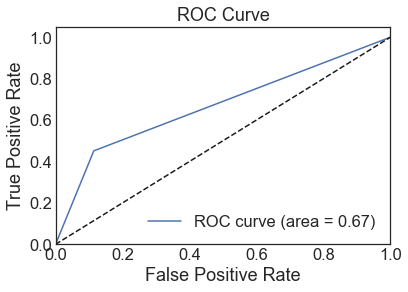

In [99]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [100]:
regr.score(x_test,y_test)

0.7316017316017316